In [2]:
from logicqubit.logic import *
from cmath import *
import numpy as np
import sympy as sp
from scipy.linalg import expm, sinm, cosm, logm, sqrtm

logicqubit-gpu version 1.4.4


In [8]:
def qft(qr):
    for i in range(len(qr)):
        for j in range(i):
            qr[i].CU1(qr[j], pi/float(2**(i-j)))
        qr[i].H()
        
def iqft(qr):
    for i in range(len(qr)):
        for j in range(i):
            qr[i].CU1(qr[j], -pi/float(2**(i-j)))
        qr[i].H()
        
def swap(s1, s2):
    s2.CX(s1)
    s1.CX(s2)
    s2.CX(s1)
    
def ancilla_rotation(k, C, N, t):
    if k == 0:
        k = 3
    theta = 2*asin(C*N*t / (2*pi*k))
    return theta

In [18]:
# Ax=b, x=3/8=0.375 e -1/8=-0.125

#A = np.matrix([[1.5,0.5],[0.5,1.5]])
A = np.matrix([[3,1],[1,3]])
t0 = 2*pi
#t0 = 0.358166*pi
register_size = 3

# Set C to be the smallest eigenvalue that can be represented by the
C = 2*pi / (2**register_size * t0)

U = np.matrix(expm(1j*A*t0/2))
U_A_div2 = np.matrix(expm(1j*A*t0/2)) 
U_A_div4 = np.matrix(expm(1j*A*t0/4))
U_A_div8 = np.matrix(expm(1j*A*t0/8))
U_A_inv_div2 = np.matrix(expm(-1j*A*t0/2)) 
U_A_inv_div4 = np.matrix(expm(-1j*A*t0/4))
U_A_inv_div8 = np.matrix(expm(-1j*A*t0/8))
print(U_A_div2)

[[ 1.00000000e+00+4.44089210e-16j -5.55111512e-17+1.94289029e-16j]
 [-5.55111512e-17+1.94289029e-16j  1.00000000e+00+4.44089210e-16j]]


In [19]:
b = np.array([1,0])
x = np.linalg.solve(A, b)
print(x)

[ 0.375 -0.125]


In [22]:
logicQuBit  = LogicQuBit(5)

m = 1

a = Qubit()
c1 = Qubit()
c2 = Qubit()
c3 = Qubit()
b = Qubit()

c1.H()
c2.H()
c3.H()

#logicQuBit.PrintState() # a,c1,c2,c3,b
#b.X()
#b.H()

# phase estimation
b.CU(c3, U_A_div8)
b.CU(c2, U_A_div4)
b.CU(c1, U_A_div2)

#b.CU(c3, U_A_div8)
#c3.CU(c2, U_A_div4)
#b.CU(c1, U_A_div2)

b.CU(c1, U)

b.CU(c2, U)
b.CU(c2, U)

b.CU(c3, U)
b.CU(c3, U)
b.CU(c3, U)

iqft([c1,c2,c3])

#logicQuBit.PrintState()

swap(c1,c2)

#a.CRY(c1, ancilla_rotation(1,C,register_size,t0))
#a.CRY(c2, ancilla_rotation(2,C,register_size,t0))
#a.CRY(c3, ancilla_rotation(3,C,register_size,t0))

a.CRY(c1, 4*pi/(2**(m-1)))
a.CRY(c2, 2*pi/(2**(m-1)))
a.CRY(c3, 1*pi/(2**(m-1)))

swap(c1,c2)

qft([c1,c2,c3])

# reverse phase estimation
b.CU(c1, U_A_inv_div2)
b.CU(c2, U_A_inv_div4)
b.CU(c3, U_A_inv_div8)

#b.CU(c1, U_A_div2.conj().T)
#c3.CU(c2, U_A_div4.conj().T)
#b.CU(c3, U_A_div8.conj().T)

c1.H()
c2.H()
c3.H()
#logicQuBit.PrintState()

In [23]:
logicQuBit.getDicPsi()

{'|00000>': (0.2499999999999998+1.7063409187895582e-16j),
 '|00001>': (-0.2499999999999998-1.4607661608023493e-16j),
 '|00010>': (-1.1086672032947227e-16+0.2499999999999993j),
 '|00011>': (2.587602823027333e-16-0.2500000000000003j),
 '|00100>': (-2.1767899912092535e-18-2.8452969587286026e-17j),
 '|00101>': (3.9745443473611747e-17-5.050973954075609e-18j),
 '|00110>': (1.3183898417423731e-16+1.0974716840810325e-16j),
 '|00111>': (9.049449079217158e-17+1.4185632400615065e-16j),
 '|01000>': (2.6104397459488953e-16-0.24999999999999967j),
 '|01001>': (-2.658060785075875e-16+0.2499999999999997j),
 '|01010>': (0.24999999999999964+3.305302732981546e-16j),
 '|01011>': (-0.24999999999999978-1.7450729144281182e-16j),
 '|01100>': (-2.102094367686143e-17+6.561309913940905e-17j),
 '|01101>': (-1.6547709805541077e-17-6.967780908044991e-17j),
 '|01110>': (-1.5224714195567952e-16-2.1867728895564751e-16j),
 '|01111>': (-4.233075739510048e-17-2.0032626727651272e-16j),
 '|10000>': (0.1249999999999994+0.301

[array(0.40623087-2.85155959e-18j), array(0.59376913-2.79524139e-19j)]


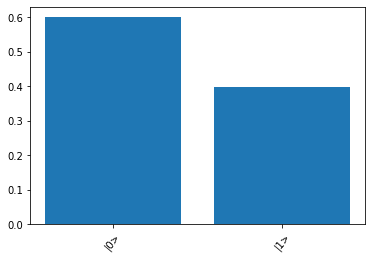

[0.6008739716199221, 0.39912602838007605]


In [15]:
res_a = logicQuBit.Measure_One(a)
print(res_a)
res = logicQuBit.Measure([b]) # x = medir(b)
logicQuBit.Plot()
print(res)

In [ ]:
def Text2List(table):
    list = [int(i, base=2) for i in table]
    size = len(table[0])
    tmp = sorted(list, key=int, reverse=False)  # values in ascending order
    result = [[int(bin(j)[2:].zfill(size)[i]) for i in range(size)] for j in tmp]
    return result

def BinList(n):
    blist = []
    for i in iter(range(2 ** n)):
        b = bin(i)[2:].zfill(n)  # value in binary, ex: i=1, n=4 -> '0001'
        blist.append(b)
    return Text2List(blist)

#size=3
#blist = [value for i,value in enumerate(BinList(size)) if res[i]>0.1] 
#results = [sum([value/2**(i+1) for i,value in enumerate(j)]) for j in blist]
#print(results)

In [17]:
# todos possíveis valores
size = 3
blist = [[i >> bl & 0x1 for bl in range(size)][::-1] for i in range(2**size)]
results = [2*pi*sum([value/2**(i+1) for i,value in enumerate(j)]) for j in blist]
results

[0.0,
 0.7853981633974483,
 1.5707963267948966,
 2.356194490192345,
 3.141592653589793,
 3.9269908169872414,
 4.71238898038469,
 5.497787143782138]

In [18]:
h_eigenvalue = np.linalg.eigh(A)
print(h_eigenvalue)

(array([2., 4.]), matrix([[-0.70710678,  0.70710678],
        [ 0.70710678,  0.70710678]]))


In [57]:
b  = [1, 1] 
a1 = h_eigenvalue[0][0]
a2 = h_eigenvalue[0][1]
v1 = h_eigenvalue[1][0]
v2 = h_eigenvalue[1][1]

In [58]:
# multiplicar lamb^-1 por a_i*v_i
(a1*v1+a2*v2)*0.75

matrix([[1.06066017, 3.18198052]])

In [59]:
x = sqrt(1/(b[0]**2/a1**2 + b[1]**2/a2**2))*(b[0]/a1*v1 + b[1]/a2*v2)
x

matrix([[-0.31622777+0.j,  0.9486833 +0.j]])

In [ ]:
logicQuBit  = LogicQuBit(5)

m = 2

a = Qubit()
c1 = Qubit()
c2 = Qubit()
c3 = Qubit()
b = Qubit()

c1.H()
c2.H()
c3.H()

#logicQuBit.PrintState() # a,c1,c2,c3,b
#b.X()
#b.H()

# phase estimation
#b.CU(c3, U_A_div8)
#b.CU(c2, U_A_div4)
#b.CU(c1, U_A_div2)

#b.CU(c3, U_A_div8)
#c3.CU(c2, U_A_div4)
#b.CU(c1, U_A_div2)

b.CU(c1, U)

b.CU(c2, U)
b.CU(c2, U)

b.CU(c3, U)
b.CU(c3, U)
b.CU(c3, U)

iqft([c1,c2,c3])

#logicQuBit.PrintState()

swap(c1,c2)

#a.CRY(c1, ancilla_rotation(1,C,register_size,t0))
#a.CRY(c2, ancilla_rotation(2,C,register_size,t0))
#a.CRY(c3, ancilla_rotation(3,C,register_size,t0))

a.CRY(c1, 4*pi/(2**(m-1)))
a.CRY(c2, 2*pi/(2**(m-1)))
a.CRY(c3, 1*pi/(2**(m-1)))

swap(c1,c2)

qft([c1,c2,c3])

# reverse phase estimation
#b.CU(c1, U_A_inv_div2)
#b.CU(c2, U_A_inv_div4)
#b.CU(c3, U_A_inv_div8)

#b.CU(c1, U_A_div2.conj().T)
#c3.CU(c2, U_A_div4.conj().T)
#b.CU(c3, U_A_div8.conj().T)

b.CU(c3, U.conj().T)
b.CU(c3, U.conj().T)
b.CU(c3, U.conj().T)

b.CU(c2, U.conj().T)
b.CU(c2, U.conj().T)

b.CU(c1, U.conj().T)

c1.H()
c2.H()
c3.H()
#logicQuBit.PrintState()